In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# -*- coding: UTF-8 -*-
from __future__ import division
import numpy as np
import pandas as pd
import sys
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re
import os
import csv
from helpers.outliers import MyOutliers
from skroutz_mobile import SkroutzMobile
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from skroutz_mobile import SkroutzMobile
from sklearn.model_selection import StratifiedShuffleSplit
from helpers.my_train_test_split import MySplitTrainTest
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Standard Scale non binary columns for the mobiles with outliers

In [25]:
orig_df = pd.read_csv('../mobiles_01_preprocessed.csv', index_col=0, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [26]:
df = orig_df.drop(
    labels=SkroutzMobile.TEMP_DROP_COLS, axis=1
)

In [27]:
df_norm_with_outliers = df.copy(deep=True)

In [28]:
ss = StandardScaler()

In [29]:
df_norm_with_outliers[df.columns] = ss.fit_transform(df[df.columns])

In [30]:
df_norm_with_outliers.to_csv('../data/mobiles/mobiles_norm.csv', encoding='utf-8', quoting=csv.QUOTE_ALL)

# Loading the one without outliers

In [3]:
random_state = np.random.RandomState(seed=16011984)

In [4]:
orig_df = pd.read_csv('../mobiles_02_no_outliers.csv', index_col=0, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [5]:
df = orig_df.drop(
    labels=SkroutzMobile.TEMP_DROP_COLS, axis=1
)

# Analysis

In [6]:
df.columns

Index([u'cpu_cores', u'sim', u'wireless_charging', u'removable_battery',
       u'card_slot', u'double_back_cam', u'fast_charge', u'flash',
       u'connectivity_bluetooth', u'connectivity_lightning',
       ...
       u'width', u'depth', u'vertical_resolution', u'horizontal_resolution',
       u'count_empty_fields', u'height_depth_area_norm',
       u'height_width_area_norm', u'volume_norm', u'width_depth_area_norm',
       u'screen_res_norm'],
      dtype='object', length=139)

In [7]:
cols = list(set(df.columns).difference(SkroutzMobile.BINARY_COLS + SkroutzMobile.PRICE_COLS))
len(cols)

27

In [8]:
cols

[u'reviews_count',
 u'weight',
 u'ram',
 u'height',
 u'selfie_cam_megapixels',
 u'volume_norm',
 u'reviewscore',
 u'diagonal_size',
 u'storage',
 u'cpu_cores',
 u'cam_megapixels',
 u'width',
 u'vertical_resolution',
 u'sim',
 u'count_empty_fields',
 u'width_depth_area_norm',
 u'height_width_area_norm',
 u'height_depth_area_norm',
 u'screen_res_norm',
 u'speaking_autonomy',
 u'stanby_autonomy',
 u'release_year',
 u'cpu_power',
 u'battery_capacity',
 u'depth',
 u'horizontal_resolution',
 u'shop_count']

In [9]:
ppc = 0

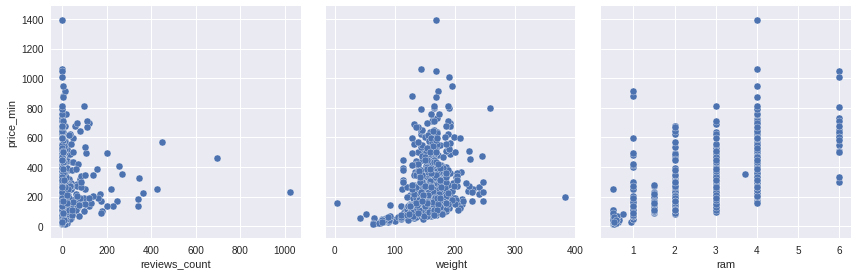

In [10]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

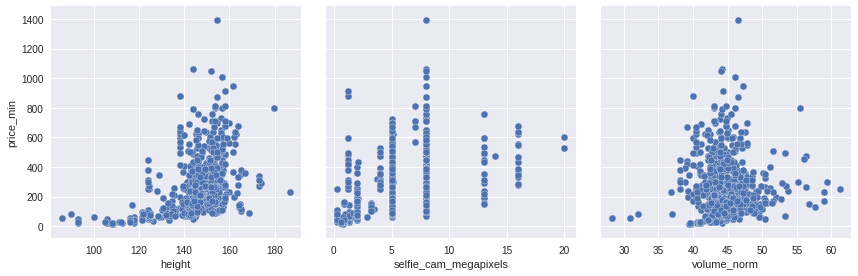

In [11]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

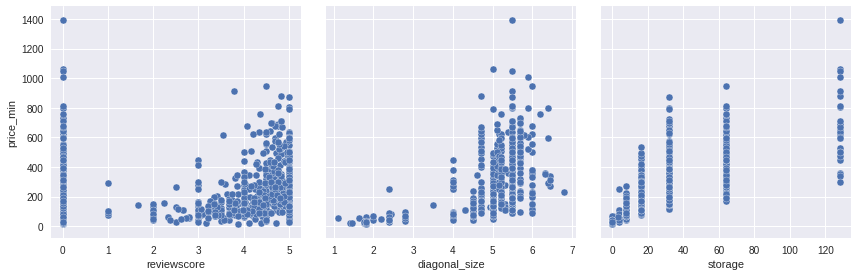

In [12]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

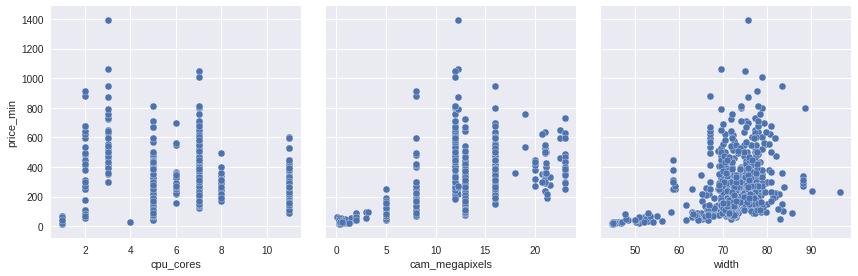

In [13]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

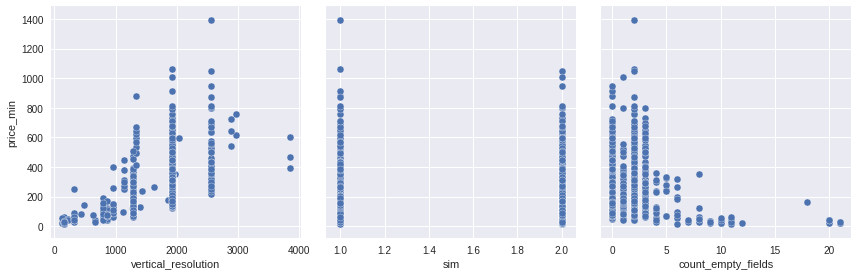

In [14]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

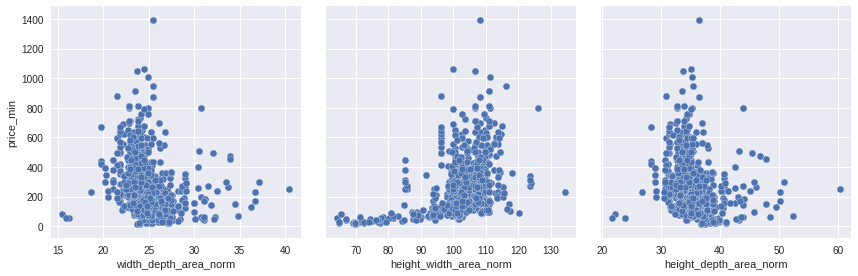

In [15]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

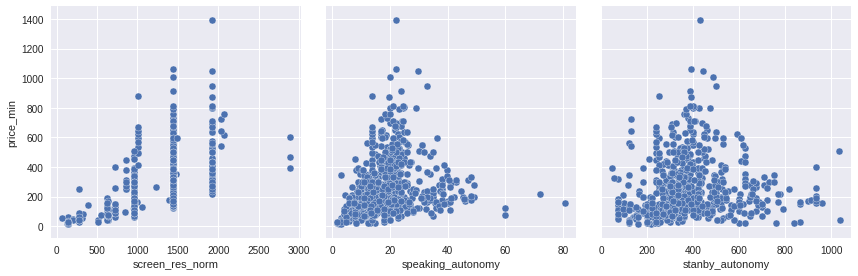

In [16]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

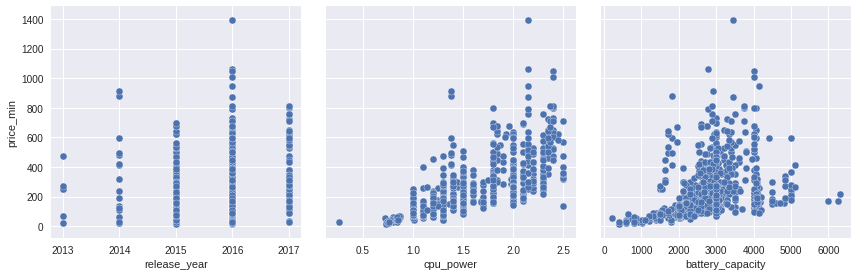

In [17]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

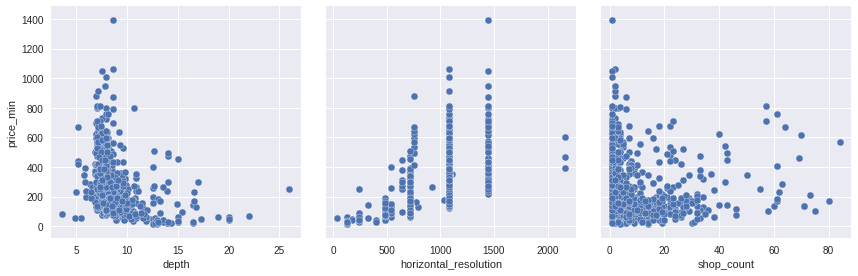

In [18]:
#fig = plt.figure(figsize=(15,7))
sns.pairplot(data=df, x_vars=[cols[ppc*3], cols[ppc*3+1], cols[ppc*3+2]],
             y_vars='price_min', size=4)
plt.show()
ppc += 1

#### PAIRPLOTS CONCLUSIONS
From the above it does not seem that a single attribute has the ability to predict the price better than others, perhaps cpu power can be consider such and it must a combination of them

## Standard Scale non binary columns

In [19]:
df_norm = df.copy(deep=True)

In [20]:
ss = StandardScaler()

In [21]:
df_norm[cols] = ss.fit_transform(df[cols])

In [23]:
#df_norm.to_csv('../data/mobiles/mobiles_no_outliers_norm.csv', encoding='utf-8', quoting=csv.QUOTE_ALL)

## Separating Testing Dataset
we want a good representation from every output, because we do NOT have a huge number of data

In [22]:
train_inds, test_inds = MySplitTrainTest().splitTrainTestForRegression(
    XX_dataframe=df_norm, yy_series=df_norm[SkroutzMobile.TARGET_COL], test_size=0.1, random_state=random_state,
    debug=True)
len(train_inds), len(test_inds)

approx factor is 10


(702, 79)

In [23]:
train_df = df_norm.iloc[train_inds]

In [24]:
test_df = df_norm.iloc[test_inds]

In [25]:
#train_df.to_csv('../mobiles_03_train.csv', encoding='utf-8', quoting=csv.QUOTE_ALL)

In [26]:
#test_df.to_csv('../mobiles_03_test.csv', encoding='utf-8', quoting=csv.QUOTE_ALL)